<a href="https://colab.research.google.com/github/tatiana-iazykova/2020_HACK_RUSSIANSUPERGLUE/blob/main/RSG_TERRa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка английского датасета для сравнения

In [ ]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://dl.fbaipublicfiles.com/glue/superglue/data/v2/RTE.zip" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

# Загрузка русскоязычного датасета

In [4]:
%%bash
# change url if you want to work with a different RSG dataset
wget -q --show-progress "https://russiansuperglue.com/tasks/download/TERRa" -O temp.zip
unzip temp.zip -d data

# remove unnecessary directories and files
rm temp.zip
rm -r data/__MACOSX
rm -r sample_data/

Archive:  temp.zip
   creating: data/TERRa/
  inflating: data/TERRa/train.jsonl  
   creating: data/__MACOSX/
   creating: data/__MACOSX/TERRa/
  inflating: data/__MACOSX/TERRa/._train.jsonl  
  inflating: data/TERRa/.DS_Store    
  inflating: data/__MACOSX/TERRa/._.DS_Store  
  inflating: data/TERRa/test.jsonl   
  inflating: data/__MACOSX/TERRa/._test.jsonl  
  inflating: data/TERRa/val.jsonl    
  inflating: data/__MACOSX/TERRa/._val.jsonl  
  inflating: data/__MACOSX/._TERRa   



     0K .......... .......... .......... .......... ..........  5% 1.06M 1s
    50K .......... .......... .......... .......... .......... 11%  647K 1s
   100K .......... .......... .......... .......... .......... 16% 11.1M 1s
   150K .......... .......... .......... .......... .......... 22% 50.9M 0s
   200K .......... .......... .......... .......... .......... 28%  131M 0s
   250K .......... .......... .......... .......... .......... 33% 1.38M 0s
   300K .......... .......... .......... .......... .......... 39% 1.07M 0s
   350K .......... .......... .......... .......... .......... 45%  154M 0s
   400K .......... .......... .......... .......... .......... 50% 1.22M 0s
   450K .......... .......... .......... .......... .......... 56% 1.27M 0s
   500K .......... .......... .......... .......... .......... 62% 1.13M 0s
   550K .......... .......... .......... .......... .......... 67% 1.20M 0s
   600K .......... .......... .......... .......... .......... 73% 1.34M 0s
   650K ...

Fancy way to display content of the dataset directory

In [5]:
%%bash
# add tree package for fancy directory display
apt-get install tree

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (586 kB/s)
Selecting previously unselected package tree.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [6]:
# display the content of the folder
!tree

.
└── data
    ├── RTE
    │   ├── test.jsonl
    │   ├── train.jsonl
    │   └── val.jsonl
    └── TERRa
        ├── test.jsonl
        ├── train.jsonl
        └── val.jsonl

3 directories, 6 files


# Загрузка в pandas

In [7]:
import pandas as pd
pd.set_option('display.max_colwidth', 1000)

class JSONL_handler():
    """ opens a jsonl file and turns it into a necessary data structure """
    
    def __init__(self, path):
        self.path = path # path to jsonl file

    def to_pandas(self):
        """ get jsonl file content as a pandas DataFrame"""
        return pd.read_json(path_or_buf=self.path, lines=True)

In [8]:
handler = JSONL_handler('data/TERRa/train.jsonl')
df = handler.to_pandas()

In [10]:
handler_val = JSONL_handler('data/TERRa/val.jsonl')
df1 = handler_val.to_pandas()

In [9]:
handler_en = JSONL_handler('data/RTE/train.jsonl')
df_en = handler_en.to_pandas()

# Общая информация про train

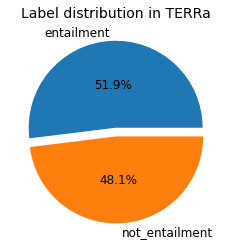

In [11]:
import matplotlib.pyplot as plt
plt.title('Label distribution in TERRa', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

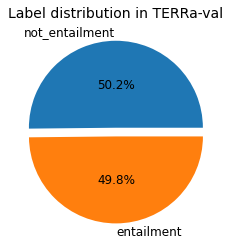

In [12]:
import matplotlib.pyplot as plt
plt.title('Label distribution in TERRa-val', fontsize=14)
plt.pie(df1['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df1['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12))
plt.show()

In [13]:
df['label'].value_counts()

entailment        1359
not_entailment    1257
Name: label, dtype: int64

In [14]:
df_en['label'].value_counts()

entailment        1249
not_entailment    1241
Name: label, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


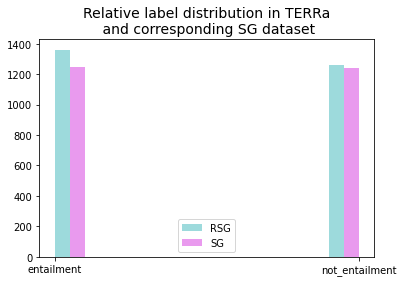

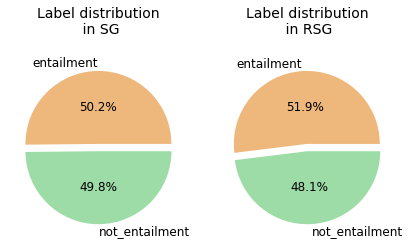

In [16]:
plt.title('Relative label distribution in TERRa\n and corresponding SG dataset', fontsize=14)
plt.hist(x = [df['label'], df_en['label']], color=["#9ddadc", "#e99aee"], label=['RSG','SG'], rwidth = 50) 
plt.legend(loc='best')
plt.show()
print()

plt.subplot(1,2,1)
colours = {'#9ddca6', '#f0afb6', '#eeb87c'}

plt.title('Label distribution\n in SG\n', fontsize=14)
plt.pie(df_en['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df_en['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.subplot(1,2,2)

plt.title('Label distribution\n in RSG\n', fontsize=14)
plt.pie(df['label'].value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=df['label'].value_counts().keys(), pctdistance=0.5, textprops = dict(fontsize = 12), colors=colours)

plt.tight_layout()
plt.show()

In [17]:
df.head()

,premise,hypothesis,label,idx
0,"Женщину доставили в больницу, за ее жизнь сейчас борются врачи.",Женщину спасают врачи.,entailment,0
1,"Он проводит невидимую грань между настоящим и будущим. В эти минуты все мы подводим главные итоги года, вспоминаем самые важные события. В эти мгновения мы с волнением ждем добрых перемен.",В эти минуты все мы подводим друг друга.,not_entailment,1
2,"Мужчина рассказал: детская коляска, принадлежащая его семье, пропала прямо из подъезда. Как выяснили полицейские, коляску украл сосед мужчины. Он был пьян, и ему нужны были деньги.",Сосед часто крадет детские коляски ради денег.,not_entailment,2
3,"Я просто об этом даже не думаю, потому что если кто-то что-то захочет, никуда не спрячешься.",Спрятаться не удастся.,entailment,3
4,"В ходе проверки нашли дома с наледью и сосульками на крышах. Информацию о них передали коммунальщикам. Во избежание несчастных случаев спасатели рекомендуют гражданам быть осторожней, а коммунальщикам – оперативней, при выходе из зданий советуют смотреть на крыши и, по возможности, обходить края зданий.",Все сосульки с крыш были сбиты.,not_entailment,4


# Entailment (ошибки и странности разметки)

In [20]:
df_true = df[(df['label'] == "entailment")]
df_true.reset_index
df_true.iloc[:10]

,premise,hypothesis,label,idx
0,"Женщину доставили в больницу, за ее жизнь сейчас борются врачи.",Женщину спасают врачи.,entailment,0
3,"Я просто об этом даже не думаю, потому что если кто-то что-то захочет, никуда не спрячешься.",Спрятаться не удастся.,entailment,3
5,"Автор поста написал в комментарии, что прорвалась канализация.",Автор поста написал про канализацию.,entailment,5
6,"""В свою очередь Владимир Путин в ходе совещания сообщил, что необходимо понимать, с какими поставщиками работают предприятия, которые дают окончательную продукцию. """"Там десятки тысяч поставщиков, но нам нужно понимать, что это за поставщики, чтобы это были те предприятия, которые в состоянии решать соответствующие проблемы, чтобы нам была понятна их рентабельность, чтобы распределение прибыли было понятным и прозрачным"""", - сказал премьер. По его словам, это необходимо, потому что когда неизвестны все схемы поставщиков, министерству обороны практически невозможно разобраться в конечной цене продукции.""",Путин хочет понятности и прозрачности в распределении прибыли у поставщиков оборонных предприятий.,entailment,6
8,"""Возраст людей определить не смог. Их лица были закрыты капюшонами, - рассказал журналисту """"Комсомольской правды""""-Саратов один из автолюбителей, проезжавших на мосту. - Со стороны обоих городов образовалась пробка, так как прибывшие машины спасателей и полиции перегородили полосу движения.""",Люди прятали лица под капюшонами.,entailment,8
9,"Родительских прав мать не лишена. Пока. А в парадном девочка оказалась, потому что дома она мешала матери выпивать.",Дочь мешала маме пить.,entailment,9
12,"""""""Несмотря на то, что в деле имеется инструкция охранников ХХС, они ничего не сделали, чтобы задержать девушек. А почему? А потому что не было никакого преступления"""".""","Охранники ничего не сделали, чтобы задержать девушек.",entailment,12
14,"Как сообщили в региональном министерстве образования, в состязаниях примут участие спортсмены спортивных и туристских клубов, образовательных организаций области.",В состязании примут участие спортсмены различных организаций.,entailment,14
15,"Предприниматели продолжают устанавливать незаконные постройки, однако власти города на примере Сенной площади уже доказали, что лучше не спорить и убрать свое добро самостоятельно.",Предприниматели иногда возводят строения незаконно.,entailment,15
17,"""""""Есть отдельное правило для """"Эха Москвы"""", отдельное правило для """"Новой газеты"""", отдельное правило для New Times (журнал The New Times - ИФ). Почему? Потому что маленькая аудитория"""".""",Маленькая аудитория - причина появления отдельных правил.,entailment,17


In [ ]:
#ошибки
df.iloc[[]]

In [ ]:
#странности
df.iloc[[]]

# Not entailment

In [22]:
df_false = df[(df['label'] == "not_entailment")]
df_false.head()

,premise,hypothesis,label,idx
1,"Он проводит невидимую грань между настоящим и будущим. В эти минуты все мы подводим главные итоги года, вспоминаем самые важные события. В эти мгновения мы с волнением ждем добрых перемен.",В эти минуты все мы подводим друг друга.,not_entailment,1
2,"Мужчина рассказал: детская коляска, принадлежащая его семье, пропала прямо из подъезда. Как выяснили полицейские, коляску украл сосед мужчины. Он был пьян, и ему нужны были деньги.",Сосед часто крадет детские коляски ради денег.,not_entailment,2
4,"В ходе проверки нашли дома с наледью и сосульками на крышах. Информацию о них передали коммунальщикам. Во избежание несчастных случаев спасатели рекомендуют гражданам быть осторожней, а коммунальщикам – оперативней, при выходе из зданий советуют смотреть на крыши и, по возможности, обходить края зданий.",Все сосульки с крыш были сбиты.,not_entailment,4
7,"Ходатайство о продлении заявила адвокат задержанной, отметив, что следствием не были предоставлены документы, характеризующие личность задержанной.",Адвокат задержанной отметила отличную работу следствия.,not_entailment,7
10,"Музей, расположенный в Королевских воротах, меняет экспозицию. На смену выставке, рассказывающей об истории ворот и их реставрации, придет «Аптека трех королей». Как рассказали в музее, посетители попадут в традиционный интерьер аптеки.",Музей закроется навсегда.,not_entailment,10
